In [1]:
import numpy as np 
import scipy 
import pylab as plt

In [5]:

BohrRad=0.529177e-10
Dalton=1.66053906892e-27
me=9.1093837e-31
mH=1.00784*Dalton
mT=3.01604928178*Dalton
GGHz2H = 1.519829846e-7

muoveH=mH/(2*me)
muoveT=mT/(2*me)

l = 0
l_prime = 2
r0=0.1
rMax=200



In [8]:
def Potential(R):
    x=R*BohrRad/4.16e-10
    D=1.28
    KToH=315775
    F=(x>D)+(x<D)*np.exp(-(D/x-1)**2)
    return 6.46/KToH*(4.889e4*np.exp(0.0968-8.6403*x-2.427*x**2)-(1.365/x**6+0.425/x**8+0.183/x**10)*F)


In [9]:

import numpy as np
def ddxH(y,rho, l, p):
    u=y[0]
    v=y[1]
    dudx=v
    dvdx=(-p**2+2*muoveH*Potential(rho) + l*(l+1)/(rho**2))*u
    return [dudx,dvdx]

import numpy as np
def ddxDumb(y,rho, l, p):
    u=y[0]
    v=y[1]
    dudx=v
    dvdx=-p**2*u
    return [dudx,dvdx]

In [10]:
def GetWellBehavedCentralState(PToInt=1, lToInt=2, L=1000, r0=0.1, function=ddxH):
    def ddxToint(rho,y):
        return function(y,rho,lToInt,PToInt)   
    rhos=np.linspace(0.1,L,10000)
    
    Init=[complex(1,0.0),complex(0,PToInt)]
    State=scipy.integrate.solve_ivp(ddxToint,[rhos[0],rhos[-1]],Init,t_eval=rhos,method='RK23')
    Norm=(State.y[0]**2+(1/PToInt*State.y[1])**2)**0.5
    return [rhos,State.y[0]/(Norm[-1]*L**(3/2))]

rhos, State1=GetWellBehavedCentralState(PToInt=0.1,lToInt=0,L=100,r0=0.1,)
rhos, State2=GetWellBehavedCentralState(PToInt=0.1,lToInt=2,L=100,r0=0.1,)

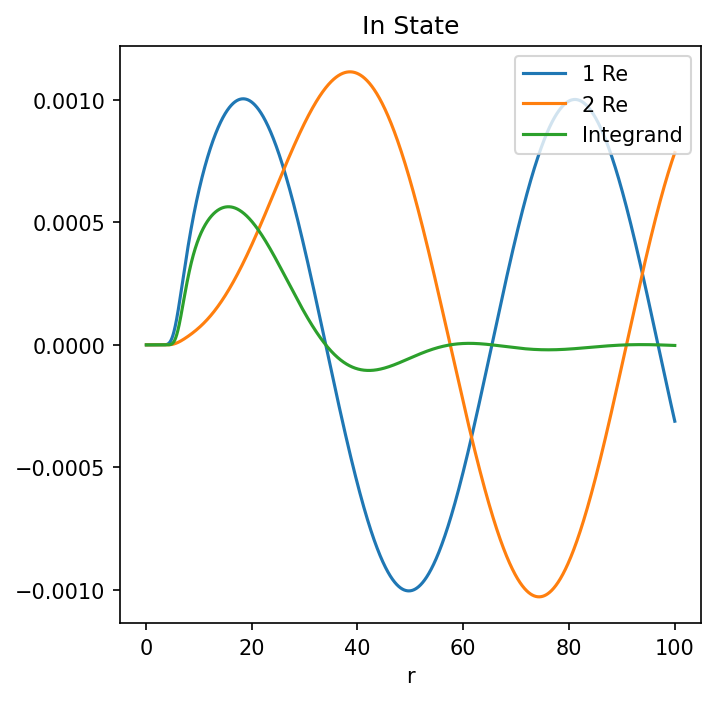

In [14]:
plt.figure(figsize=(5,5), dpi=150)
plt.title("In State")
plt.plot(rhos,np.real(State1),label='1 Re')
plt.plot(rhos,np.real(State2),label='2 Re')
Integrand=State1*np.conj(State2)/rhos**3*1e6
plt.plot(rhos,Integrand*10,label='Integrand')
plt.legend(loc='upper right')
#plt.plot(rhos)
#plt.loglog()
plt.xlabel("r")
plt.show()
